# Pyber

Rural rides on average generated the most revenue per ride. Which is probably due to the longer distance and scarcity of rides available. 

It's no surprise that Urban riders and amount of drives dominated highest total fare, drivers, and rides given.

Suburban rides seem to be the best area to focus, as there is a good amount of rides given, not that many drivers, and higher fares/longer drives. 

In [2]:
#Dependencies
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [3]:
ride_data = pd.read_csv("raw_data/ride_data.csv")
city_data = pd.read_csv("raw_data/city_data.csv")

city_ride_data = pd.merge(ride_data, city_data, how="left", on="city")
city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [4]:
#Filtered Data into three types
urban_cities = city_ride_data[city_ride_data["type"] == "Urban"]
suburban_cities = city_ride_data[city_ride_data["type"] == "Suburban"]
rural_cities = city_ride_data[city_ride_data["type"] == "Rural"]

#Urban Data
urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]

#Suburban Data
suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]

#Rural Data
rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]

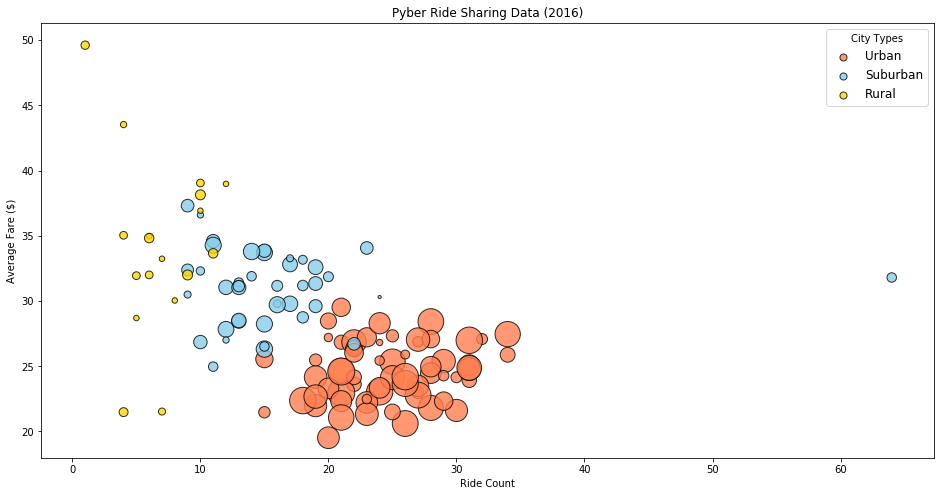

Note:
Circle size correlates with driver count per city.


<Figure size 432x288 with 0 Axes>

In [5]:
plt.figure(figsize = (16, 8))

plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, 
            marker='o', color="coral", edgecolor='black', 
            linewidths=1, alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, 
            marker='o', color="skyblue", edgecolor='black', 
            linewidths=1, alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, 
            marker='o', color="gold", edgecolor='black', 
            linewidths=1, alpha=0.8, label="Rural")

plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Ride Count")
plt.legend(loc="best")

lgnd = plt.legend(fontsize="large", mode="Expanded",
                  numpoints=1, scatterpoints=1,
                  loc="best", title="City Types",
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]

plt.show()
print("Note:\nCircle size correlates with driver count per city.")

plt.savefig("Pyber Analysis.png")

# Pie Chart for Percentage of Total Fares by City Type

(-1.1190431534235785,
 1.2010491103371637,
 -1.146700105708372,
 1.1022238145575416)

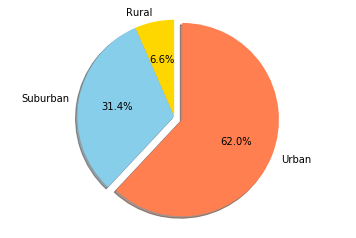

In [32]:
fare_by_city = city_ride_data.groupby("type").sum()["fare"] / city_ride_data["fare"].sum() * 100

plt.pie(type_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "skyblue", "coral"],
        explode=[0, 0, .09],
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")

# Pie Chart for Percentage of Total Rides by City Type

(-1.1093770432494374,
 1.1843197915691948,
 -1.1560018922553597,
 1.1026667567740647)

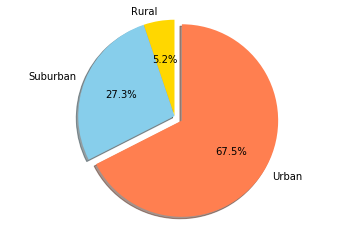

In [44]:
rides_by_city = city_ride_data.groupby("type").count()['ride_id']/city_ride_data['ride_id'].count() * 100
rides_by_city
plt.pie(rides_by_city,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "skyblue", "coral"],
        explode=[0,0, .09],
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")

# Pie Chart for Percentage of Total Drivers by City Type

(-1.13708237963002,
 1.1881321526810804,
 -1.1515343288981246,
 1.1024540156618154)

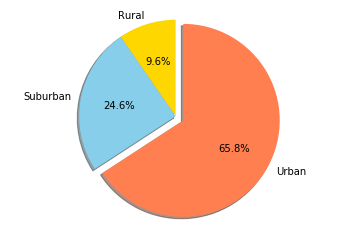

In [55]:
drivers_by_city = city_ride_data.groupby("type").mean()['driver_count'] / city_ride_data["driver_count"].mean() * 100
drivers_by_city
plt.pie(drivers_by_city,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "skyblue", "coral"],
        explode=[0,0, .09],
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")